In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=eaaa91f143673e86db6e4ed52622cbf847149e65daa9b4b952a0d485f159aca0
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Recommended washing time: 38.56390977443606 minutes


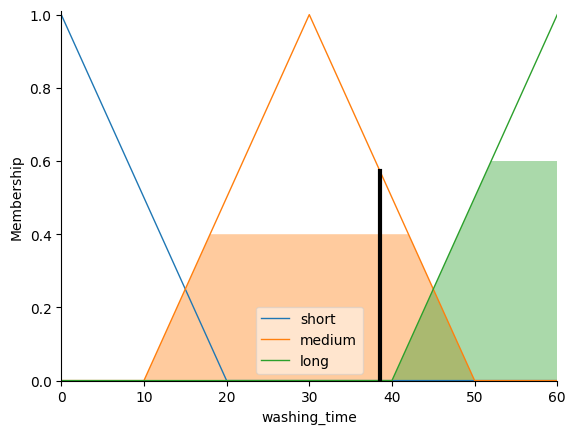

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy variables
dirt_level = ctrl.Antecedent(np.arange(0, 11, 1), 'dirt_level')
laundry_amount = ctrl.Antecedent(np.arange(0, 11, 1), 'laundry_amount')
washing_time = ctrl.Consequent(np.arange(0, 61, 1), 'washing_time')

# Custom membership functions for dirt level
dirt_level['low'] = fuzz.trimf(dirt_level.universe, [0, 0, 5])
dirt_level['medium'] = fuzz.trimf(dirt_level.universe, [0, 5, 10])
dirt_level['high'] = fuzz.trimf(dirt_level.universe, [5, 10, 10])

# Custom membership functions for laundry amount
laundry_amount['small'] = fuzz.trimf(laundry_amount.universe, [0, 0, 5])
laundry_amount['average'] = fuzz.trimf(laundry_amount.universe, [0, 5, 10])
laundry_amount['large'] = fuzz.trimf(laundry_amount.universe, [5, 10, 10])

# Custom membership functions for washing time
washing_time['short'] = fuzz.trimf(washing_time.universe, [0, 0, 20])
washing_time['medium'] = fuzz.trimf(washing_time.universe, [10, 30, 50])
washing_time['long'] = fuzz.trimf(washing_time.universe, [40, 60, 60])

# Define fuzzy rules
rule1 = ctrl.Rule(dirt_level['low'] & laundry_amount['small'], washing_time['short'])
rule2 = ctrl.Rule(dirt_level['low'] & laundry_amount['average'], washing_time['medium'])
rule3 = ctrl.Rule(dirt_level['low'] & laundry_amount['large'], washing_time['long'])
rule4 = ctrl.Rule(dirt_level['medium'] & laundry_amount['small'], washing_time['short'])
rule5 = ctrl.Rule(dirt_level['medium'] & laundry_amount['average'], washing_time['medium'])
rule6 = ctrl.Rule(dirt_level['medium'] & laundry_amount['large'], washing_time['long'])
rule7 = ctrl.Rule(dirt_level['high'] & laundry_amount['small'], washing_time['short'])
rule8 = ctrl.Rule(dirt_level['high'] & laundry_amount['average'], washing_time['medium'])
rule9 = ctrl.Rule(dirt_level['high'] & laundry_amount['large'], washing_time['long'])

# Create control system
washing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
washing_simulation = ctrl.ControlSystemSimulation(washing_ctrl)

# Input values
washing_simulation.input['dirt_level'] = 6
washing_simulation.input['laundry_amount'] = 8

# Compute the result
washing_simulation.compute()

print(f"Recommended washing time: {washing_simulation.output['washing_time']} minutes")

# Plotting the result
washing_time.view(sim=washing_simulation)
plt.show()
